**User Identification from Walking Activity using Machine Learning and Deep Learning**
---

Evangelidakis Leandros






# **Importing Libraries**


---


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob, os 
import string
from functools import reduce
sns.set()

In [ ]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support,classification_report
from sklearn.preprocessing import Normalizer,MinMaxScaler,LabelEncoder



In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Flatten,MaxPool2D,Conv2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
#import ktrain

# **Loading the data**


---

Dataset 49 features extracted from accelerometer data taken from a smartphone. Check dataset link for more information.



In [ ]:
# Data repository : http://archive.ics.uci.edu/ml/datasets/User+Identification+From+Walking+Activity#
# Feautre set data : https://github.com/theumairahmed/User-Identification-and-Classification-From-Walking-Activity/blob/master/Features/Features.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
data = np.loadtxt('/content/drive/My Drive/Colab Notebooks/walking_features.csv', delimiter=",",skiprows=1)

In [ ]:
data[0]

array([ 0.00000000e+00, -3.83807210e+00,  2.32459239e+00,  5.40372980e+00,
       -8.92130000e+00,  1.18500000e+00,  2.00326162e-02,  2.96550884e-01,
        2.67484625e-02,  1.12077398e+00, -9.01062990e-02, -5.25018064e-01,
        2.31294023e+00,  8.85745600e+00,  3.02213223e+00,  9.13328325e+00,
        3.02370000e+00,  1.50910000e+01,  3.80614663e-02,  4.70436194e-01,
        4.52097521e-02,  3.09685517e+00, -1.11584806e-01, -9.22380692e-01,
        3.00698361e+00, -1.36680088e+00,  1.69644537e+00,  2.87792690e+00,
       -5.17570000e+00,  2.22010000e+00,  2.60165605e-02,  3.16458214e-01,
        1.42457382e-02,  6.35687905e-01, -1.65912246e-01, -6.81842414e-01,
        1.68794183e+00,  1.01023237e+01,  3.21569930e+00,  1.03407220e+01,
        4.63350071e+00,  1.58663102e+01,  4.14233884e-02,  4.78668236e-01,
        5.11865740e-02,  3.58103072e+00, -2.54933173e-02, -1.20023600e+00,
        3.19958041e+00])

In [ ]:
data.shape

(393, 49)

In [ ]:
#Split X,y

X = data[:, 1:]
print("Train matrix size:",X.shape)
y = data[:, 0]   
print("Test matrix size:",y.shape)

Train matrix size: (393, 48)
Test matrix size: (393,)


In [ ]:
#Normalize the dataset

#norm = Normalizer().fit(X)
#X = norm.transform(X)

# **Machine Learning using sklearn**


---
We use 40% of data for testing. Accuracy is calculated using use 10-fold Cross Validation

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.4)

In [ ]:
def fit_and_cv(clf):
  clf.fit(X_train,y_train)
  #y_pred=clf.predict(X_test)
  scores = cross_val_score(clf, X, y, cv=10,n_jobs=-1)
  print("10-fold CV mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


In [ ]:
def display_metrics(clf):
  y_pred = clf.predict(X_test)
  metrics = precision_recall_fscore_support(y_test,y_pred)
  fig,ax = plt.subplots(figsize=(20,10))
  x = np.arange(1,19)
  y =np.arange(0,1.1,0.1)
  plt.grid(color='white')
  ax.plot(x,metrics[0],'o-')
  ax.plot(x,metrics[1],'o-')
  ax.plot(x,metrics[2],'o-')
  ax.legend(['precision','recall','f-score'],loc='upper right')
  ax.set_xlabel ('Users',weight='bold',fontsize=16)
  ax.set_title ('Precision, Recall and F-score values',weight='bold',fontsize=16)
  plt.yticks(y)
  plt.xticks(x)
  plt.show()



## **Support Vector Machines**


---
We use different kernels and Stohastic Gradient Descent


10-fold CV mean Accuracy: 0.95 (+/- 0.09)


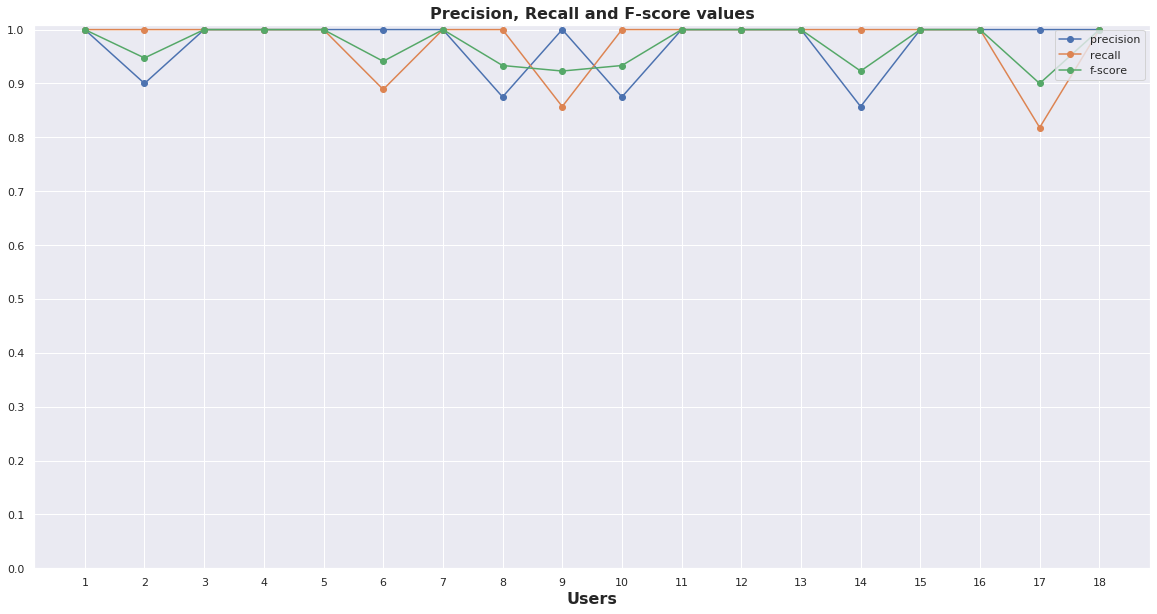

In [ ]:
clf = svm.SVC(kernel='linear',C=1)
fit_and_cv(clf)
display_metrics(clf)

10-fold CV mean Accuracy: 0.95 (+/- 0.06)


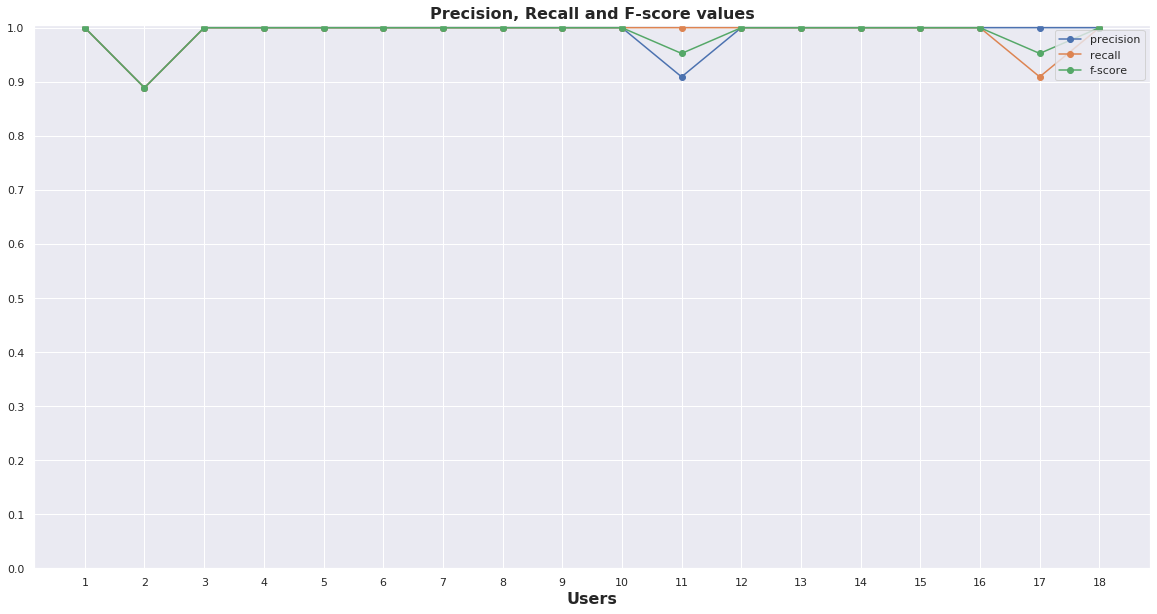

In [ ]:
clf = svm.SVC(gamma=0.02,C=1)
fit_and_cv(clf)
display_metrics(clf)

10-fold CV mean Accuracy: 0.90 (+/- 0.10)


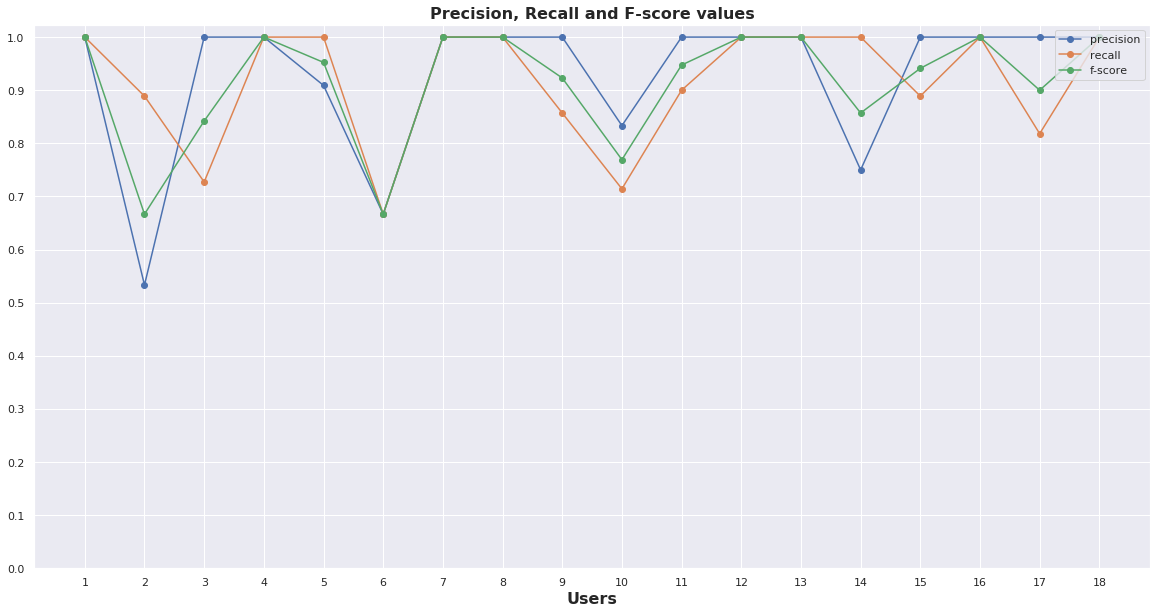

In [ ]:
clf = SGDClassifier(alpha= 0.001, l1_ratio= 0.5, loss= 'hinge', penalty= 'l1')
fit_and_cv(clf)
display_metrics(clf)


## **K-Neighbors**

10-fold CV mean Accuracy: 0.93 (+/- 0.11)


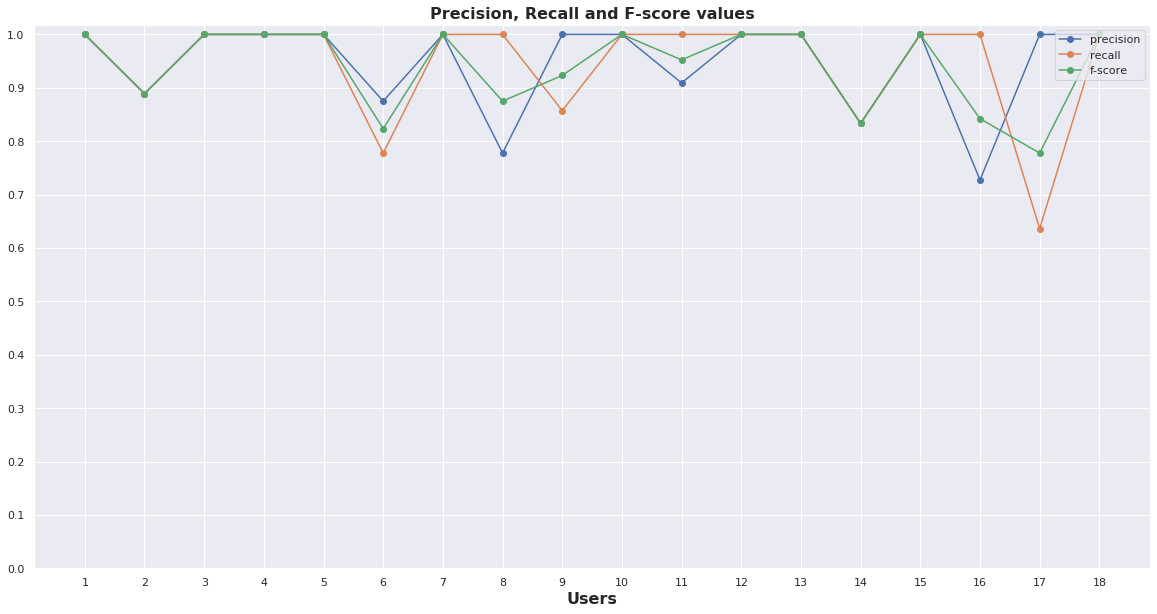

In [ ]:
clf = KNeighborsClassifier(5,n_jobs=-1)
fit_and_cv(clf)
display_metrics(clf)

## **Random Forests**

10-fold CV mean Accuracy: 0.94 (+/- 0.11)


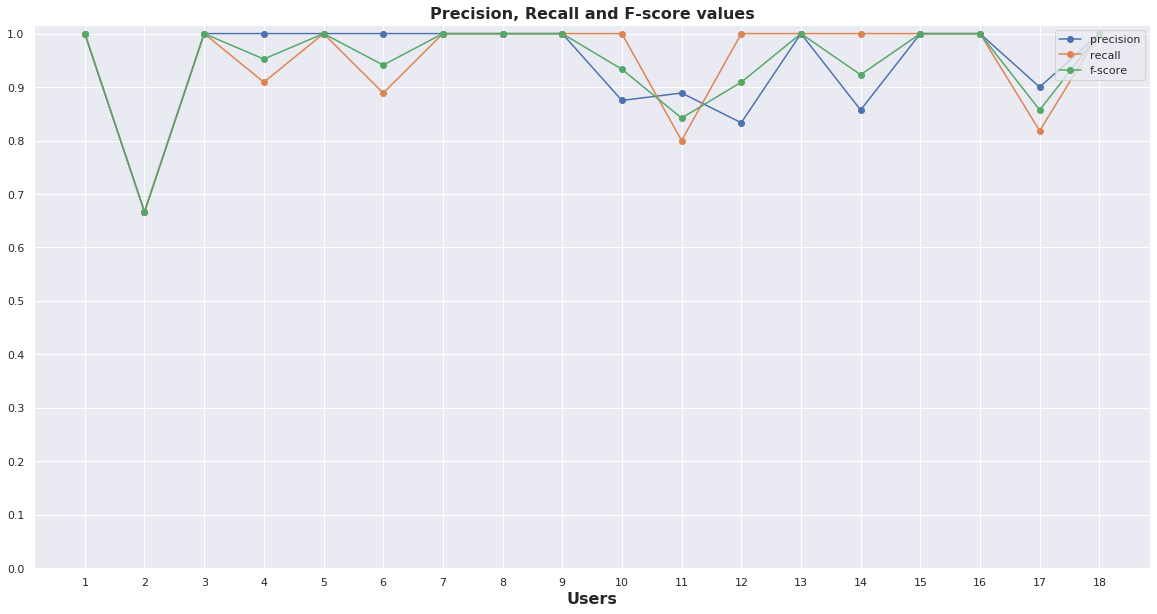

In [ ]:
clf=RandomForestClassifier(max_depth=120, n_estimators=150, max_features=30,n_jobs=-1)
fit_and_cv(clf)
display_metrics(clf)

## **GridSearch for parameters**
 For SGD and LinearSVC

In [ ]:
#For SGD
tuned_parameters = {'loss': ['hinge','log','modified_huber','squared_hinge','perceptron'],'penalty': ['l2','l1','elasticnet'],
                    'alpha': [10 ** x for x in range(-6, 1)],'l1_ratio': [0, 0.05, 0.1, 0.2, 0.5, 0.8, 0.9, 0.95, 1],
                    'max_iter':list(range(1000,10000,500))}

#For LinearSVC
tuned_parameters3 = {'loss': ['squared_hinge'],'tol':[10 ** x for x in range(-6, 1)],
                     'C':[10 ** x for x in range(-6, 1)],
                     'penalty': ['l2','l1'],'dual':[False],'max_iter':list(range(0,10000,500))}

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.LinearSVC(), tuned_parameters, scoring='%s_macro' % score,n_jobs=-1)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    #    print("%0.3f (+/-%0.03f) for %r"
    #          % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

In [ ]:
y_pred = clf.predict(X_test)
scores = cross_val_score(clf,X,y,cv=10)


# **Neural Networks using Keras**


---



In [ ]:
y = tf.keras.utils.to_categorical(y,num_classes=18,dtype='float32')

In [ ]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.4, random_state=1)


In [ ]:
def create_model(activation='relu',size=20*48,dropout=0.1):
    
    model = Sequential()
    model.add(Dense(size, input_dim=48, activation=activation))
    #model.add(Dropout(dropout))
    model.add(Dense(18, activation='softmax'))
    model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model
    


In [ ]:
model = create_model()
batch_size = 6
print('Train...')
history = model.fit(X_train, y_train,batch_size=batch_size,epochs=200,validation_data=(X_test, y_test),use_multiprocessing=True)
score, acc = model.evaluate(X_test, y_test,batch_size=batch_size,use_multiprocessing=True)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 235 samples, validate on 158 samples
Epoch 1/200
235/235 [==============================] - 2s 10ms/sample - loss: 2.6910 - accuracy: 0.2723 - val_loss: 2.0127 - val_accuracy: 0.4177
Epoch 2/200
235/235 [==============================] - 0s 953us/sample - loss: 1.3997 - accuracy: 0.5872 - val_loss: 1.0729 - val_accuracy: 0.6392
Epoch 3/200
235/235 [==============================] - 0s 812us/sample - loss: 0.9437 - accuracy: 0.7234 - val_loss: 0.8034 - val_accuracy: 0.7658
Epoch 4/200
235/235 [==============================] - 0s 861us/sample - loss: 0.7571 - accuracy: 0.7660 - val_loss: 0.6053 - val_accuracy: 0.8987
Epoch 5/200
235/235 [==============================] - 0s 911us/sample - loss: 0.5431 - accuracy: 0.8851 - val_loss: 0.5052 - val_accuracy: 0.9051
Epoch 6/200
235/235 [==============================] - 0s 847us/sample - loss: 0.5609 - accuracy: 0.8213 - val_loss: 0.6361 - val_accuracy: 0.7468
Epoch 7/200
235/235 [==============================] - 0s 853us/

In [ ]:
estimator = KerasClassifier(build_fn=create_model,verbose=0,epochs=200,batch_size=6) 

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, y, cv=kfold,n_jobs=-1)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean(), results.std()))

Baseline: 95.90% (4.76%)


## **Grid Search for parameters**

In [ ]:
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3,0.5,0.7,0.9]
#momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
activation=['relu','sigmoid','tanh','softmax','exponential','linear']
size=[10,20,48,5*48,10*48,20*48]
dropout=[0.1,0.5,0.8]
params={'size':size}
#model=create_model()
gridsearch=GridSearchCV(estimator=estimator,param_grid=params, n_jobs=-1,cv=10)
grid_result = gridsearch.fit(X_train, y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#print(params)
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.944928 using {'size': 960}
0.557971 (0.090355) with: {'size': 10}
0.701630 (0.077239) with: {'size': 20}
0.821377 (0.045717) with: {'size': 48}
0.932065 (0.060020) with: {'size': 240}
0.932065 (0.065550) with: {'size': 480}
0.944928 (0.052954) with: {'size': 960}


## **Visualizing Metics and Losses**

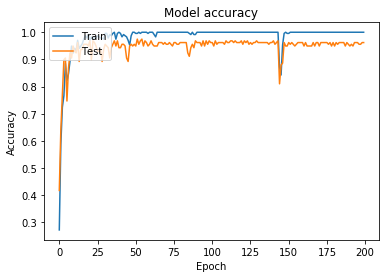

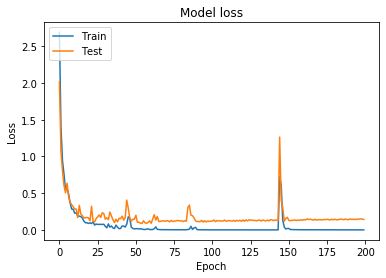

In [ ]:
history_dict = history.history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()